<a href="https://colab.research.google.com/github/Sanjeeviit/Business-Analytics/blob/main/BA_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np


In [46]:
df = pd.read_excel('/content/05-MLR-correct.xlsx',sheet_name='Data')

In [47]:
df.head()

,Unnamed: 0,Y,X1,X2,Unnamed: 4,Unnamed: 5,Unnamed: 6,GPA at college,Entrance exam,interview
0,record,GPA at college,Entrance exam,interview,NaN,NaN,GPA at college,1,0.74666,0.763283
1,1,9.5,9.8,9.1,NaN,NaN,Entrance exam,0.74666,1,0.540056
2,2,6.3,7.5,7.1,NaN,NaN,interview,0.763283,0.540056,1
3,3,8.2,7.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9.1,9.5,9.6,NaN,NaN,NaN,GPA at college,Entrance exam,interview


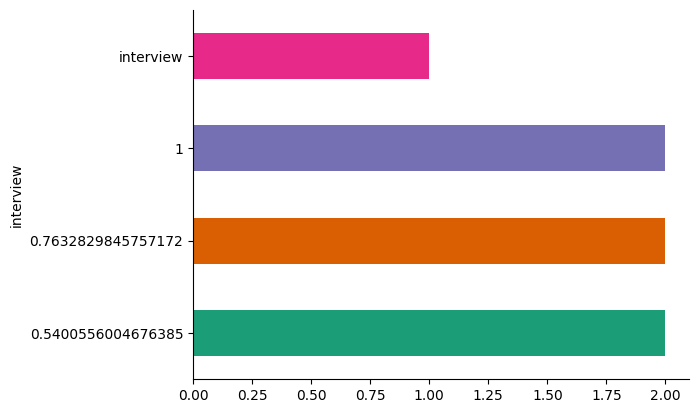

In [48]:
# @title interview

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('interview').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
df.describe()

,Unnamed: 4,Unnamed: 5
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [50]:
df2 = df[['Y','X1','X2']]
df2.drop([0,16,17,18,19])

,Y,X1,X2
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [51]:
df3 =df2.drop([0,16,17,18,19])

In [52]:
df3.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace =True)

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GPA        15 non-null     object
 1   Entrance   15 non-null     object
 2   Interview  15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [54]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace=True)

<ipython-input-54-947fefcdb64e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace=True)


In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GPA        15 non-null     object
 1   Entrance   15 non-null     object
 2   Interview  15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [56]:
df3 =df3.astype(float)

In [57]:
df3.head()

,GPA,Entrance,Interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5


In [58]:
df3.shape

(15, 3)

In [59]:
df3 =df3.reset_index()

In [60]:
df3

,index,GPA,Entrance,Interview
0,1,9.50,9.80,9.1
1,2,6.30,7.50,7.1
2,3,8.20,7.90,7.7
3,4,9.10,9.50,9.6
4,5,8.20,9.10,7.5
5,6,8.32,8.50,8.4
6,7,9.60,7.54,9.5
7,8,7.60,8.40,7.8
8,9,6.50,5.60,7.8
9,10,8.64,8.00,8.5


In [61]:
df4=df3[['GPA','Entrance','Interview']]
df4


,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


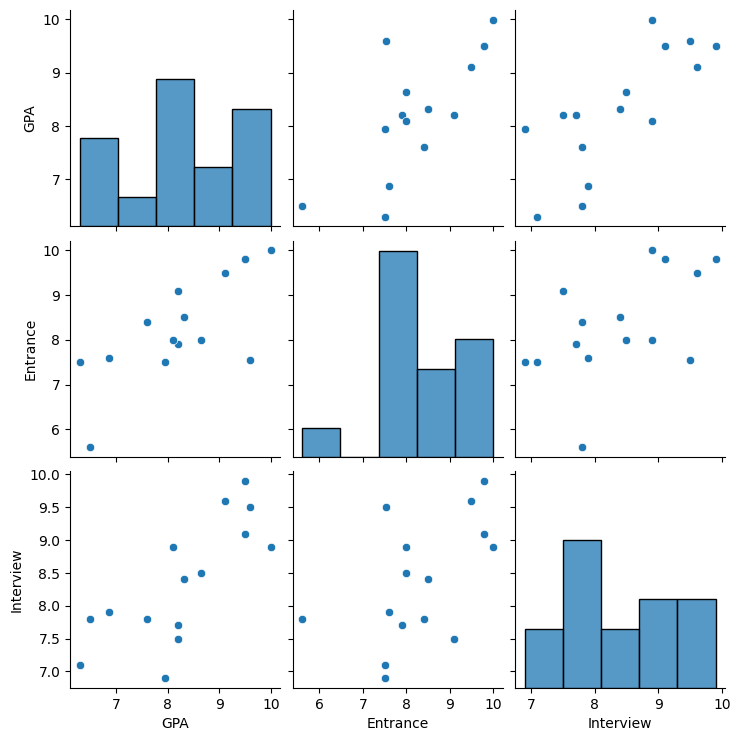

In [62]:
import seaborn as sns
sns.pairplot(df4)


In [63]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm

In [64]:
model2 = smf.ols(formula='GPA ~ Entrance +Interview', data =df4)
results2 = model2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     17.12
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           0.000305
Time:                        04:14:44   Log-Likelihood:                -12.591
No. Observations:                  15   AIC:                             31.18
Df Residuals:                      12   BIC:                             33.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7044      1.577     -0.447      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
from statsmodels.tools.tools import add_constant

In [70]:
[variance_inflation_factor(add_constant(df4[['Entrance','Interview']]).values,i) for i in range(len(add_constant(df4[['Entrance','Interview']]).columns))]

[95.05280153277468, 1.411751521644102, 1.4117515216441023]

In [76]:
print(results2)

Residuals

In [73]:
df5 = pd.DataFrame()
df5['prediction'] = results2.fittevalues.copy()
df5['Observed'] = df5["GPA"].values.copy()
df5['res']= df5['Observed']- df5['prediction']

AttributeError: 'OLSResults' object has no attribute 'fittevalues'

In [79]:
import pandas as pd

# Assuming 'results2' is an instance of OLSResults
# Make sure you've imported statsmodels and performed the regression

# Create an empty DataFrame
df5 = pd.DataFrame()

# Assuming 'results2' contains the results of the regression
# Access the fitted values and copy them to the 'prediction' column
df5['prediction'] = results2.fittedvalues.copy()

# Assuming 'GPA' is a column in your original DataFrame
# Copy the values of 'GPA' to the 'Observed' column
# Copy the values of 'GPA' to the 'Observed' column
df5['Observed'] = df5['GPA'].values.copy()


# Calculate residuals and store them in the 'res' column
df5['res'] = df5['Observed'] - df5['prediction']


KeyError: 'GPA'

In [80]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [84]:
regModel2 = linear_model.LinearRegression()
df4

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


In [85]:
regModel2.fit(np.array(df4[['Entrance','Interview']]).reshape(-1,2),np.array(df4['GPA']).reshape(-1,1))

LinearRegression()

In [87]:
print('Coefficient:\n',regModel2.coef_)

Coefficient:
 [[0.45544232 0.62250322]]


In [88]:
print('Intercept:\n',regModel2.intercept_)

Intercept:
 [-0.70440195]


In [90]:
df4

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


In [91]:
df4['predSKLearnTransform'] = regModel2.predict(np.array(df4[['Entrance','Interview']]).reshape(-1,2))

In [92]:
df4

,GPA,Entrance,Interview,predSKLearnTransform
0,9.50,9.80,9.1,9.423712
1,6.30,7.50,7.1,7.131188
2,8.20,7.90,7.7,7.686867
3,9.10,9.50,9.6,9.598331
4,8.20,9.10,7.5,8.108897
5,8.32,8.50,8.4,8.395885
6,9.60,7.54,9.5,8.643414
7,7.60,8.40,7.8,7.976839
8,6.50,5.60,7.8,6.701600
9,8.64,8.00,8.5,8.230414
